# 1.Genereate data 

In [1]:
import numpy as np
import random


In [4]:
def genData(numPoints,A,K,variance):
    x = np.zeros(shape = (numPoints,2))
    y = np.zeros(shape = numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (A*i +K) + random.uniform(0,1) * variance
    return x, y


[]

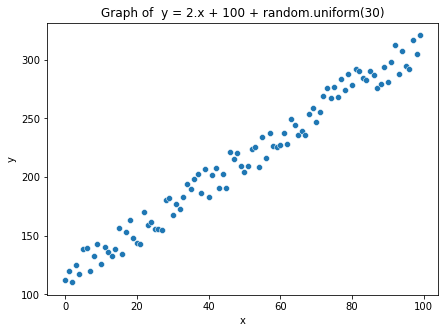

In [5]:
x , y = genData(numPoints=100, A=2, K=100, variance=30)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:, 1], y=y )
fig.set(xlabel = 'x', ylabel = 'y', title = 'Graph of  y = 2.x + 100 + random.uniform(30)')
plt.plot()

# 2. Fitting a model to the data 

In [7]:
m,n = np.shape(x)
alpha = 0.05
theta = np.ones(n)
theta

array([1., 1.])

In [8]:
x.T    

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77

In [10]:
best_guess = np.dot(x,theta)    # theta = 1   1 
best_guess

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

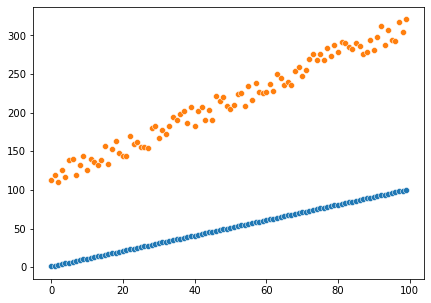

In [17]:
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x = x[:, 1], y= best_guess)
fig = sns.scatterplot(x = x[:, 1], y= y)

In [18]:
loss = best_guess - y
loss

array([-111.23933304, -117.93102686, -107.18907885, -121.30719946,
       -112.02203333, -132.34346308, -132.46420773, -111.66722591,
       -123.85070883, -133.35047812, -114.4963295 , -128.22584689,
       -123.5277164 , -118.56668718, -123.32488281, -140.8477443 ,
       -117.00360518, -134.79769529, -144.53803444, -127.88080564,
       -122.83787841, -121.33544984, -146.79912984, -135.37205704,
       -136.4152676 , -129.43241211, -128.55719674, -126.84783016,
       -151.59867823, -152.14456613, -136.32182675, -145.18241176,
       -139.79390994, -148.59120314, -159.28570087, -154.12308989,
       -160.97987365, -164.3979675 , -147.25089843, -167.133461  ,
       -142.3545229 , -159.96633433, -164.86847825, -146.35700052,
       -157.96617869, -144.86663828, -174.74349857, -167.4251797 ,
       -171.13944458, -159.19786769, -153.41740894, -157.76162087,
       -171.24274755, -171.46595572, -153.57688346, -178.0214648 ,
       -159.22317805, -179.88135582, -167.26204755, -165.36894

In [19]:
cost = np.sum(loss**2)/(2*m)
cost

13847.655197686796

In [21]:
gradient = np.ones(n)
gradient[0]= 0
gradient[1] = 1
for i in range(len(x)):
    gradient[0] += - (1/m) * (y[i] - ((theta[0] - x[i,1]) + theta[1]))
    gradient[1] += - (1/m) * x[i,1]* (y[i] - ((theta[0]*x[i,1]) + theta[1]))

gradient

array([ -261.60116412, -8937.61530029])

In [22]:
theta = theta -alpha*gradient
theta

array([ 14.08005821, 447.88076501])

In [23]:
best_guess = np.dot(x,theta)

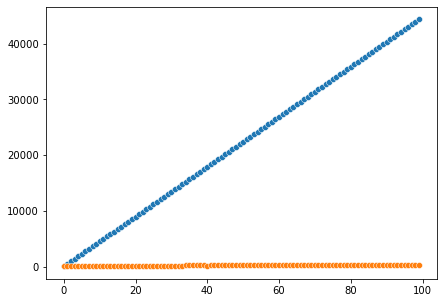

In [24]:
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x = x[:, 1], y= best_guess)
fig = sns.scatterplot(x = x[:, 1], y= y)

# Notes:  gradient descent and plot
